# Fashion-MNIST CNN classifyer
 Example from "Python Machine Learning by Example"

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data import and preparation

In [1]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [34]:
print(y_train[0:10])
print(f"\nTrain size: {x_train.shape[0]}\nTest size {x_test.shape[0]}")
uniques, count = np.unique(y_train, return_counts=True)
uniques = list(map(str,uniques))
print(dict(zip(uniques, count)))
class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',\
             'Sneaker','Bag','Ancle boot']

[9 0 0 3 0 2 7 2 5 5]

Train size: 60000
Test size 10000
{'0': 6000, '1': 6000, '2': 6000, '3': 6000, '4': 6000, '5': 6000, '6': 6000, '7': 6000, '8': 6000, '9': 6000}


In [37]:
if x_train.max() > 1.:
    x_train = x_train/255.0
    x_test = x_test/255.0

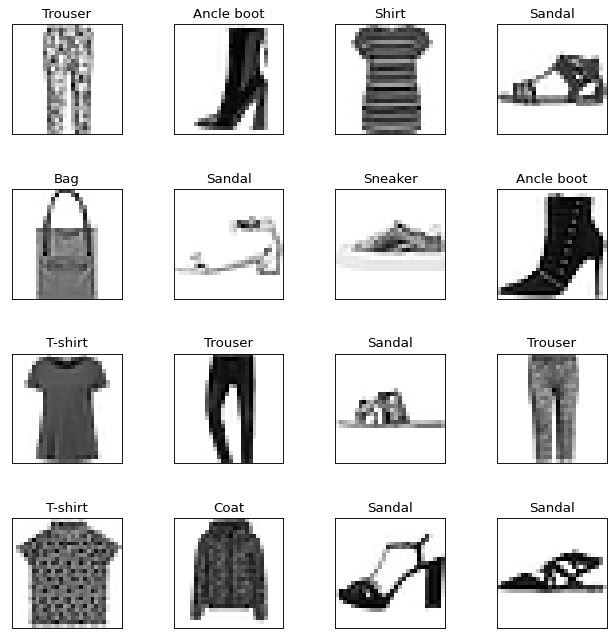

In [56]:
offset = np.random.randint(60000-16)
plt.figure(figsize=(10, 10), dpi=80);
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+offset],cmap=plt.cm.binary)
    plt.title(class_names[y_train[i+offset]])
    

The Convolutional layers in Keras take tensors of rank four, with dimensions (#samples,height,width,#colours). Hence we need to reshape our tensors to add the last dimension.

In [63]:
if len(x_train.shape) == 3:
    x_train = x_train.reshape((x_train.shape[0],28,28,1))
    x_test = x_test.reshape((x_test.shape[0],28,28,1))

# Build the model

In [103]:
tf.random.set_seed(42)

In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

input_layer = layers.Input(shape=(28,28,1))
layer_1 = layers.Conv2D(32,(3,3),activation="relu")(input_layer)
layer_2 = layers.MaxPooling2D((2,2))(layer_1)
layer_3 = layers.Conv2D(64,(3,3),activation='relu')(layer_2)
layer_4 = layers.MaxPooling2D((2,2))(layer_3)
layer_5 = layers.Conv2D(128,(3,3),activation='relu')(layer_4)
layer_6 = layers.Flatten()(layer_5)
layer_7 = layers.Dense(64,activation='relu')(layer_6)
output_layer = layers.Dense(10,activation='softmax')(layer_7)

model = Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer='adam',loss=losses.sparse_categorical_crossentropy,\
             metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

# Fitting the Model

In [105]:
fit_history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4751 - accuracy: 0.8249 - val_loss: 0.3440 - val_accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3063 - accuracy: 0.8875 - val_loss: 0.3595 - val_accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2614 - accuracy: 0.9032 - val_loss: 0.2914 - val_accuracy: 0.8920
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2306 - accuracy: 0.9134 - val_loss: 0.2693 - val_accuracy: 0.9022
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2052 - accuracy: 0.9231 - val_loss: 0.2747 - val_accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1817 - accuracy: 0.9323 - val_loss: 0.2703 - val_accuracy: 0.9033
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1644 - accuracy: 0.9387 - val_loss: 0.2573 -

In [106]:
predictions = model.predict(x_test)
predictions[3]

array([3.4973406e-11, 1.0000000e+00, 3.0613190e-17, 2.0955363e-14,
       8.5938819e-15, 1.4212131e-19, 7.8171807e-15, 1.8071980e-23,
       2.3288818e-19, 9.6384673e-23], dtype=float32)

In [107]:
y_pred = np.array([pred.argmax() for pred in predictions])

In [108]:
print(f"el modelo acierta {np.sum(y_pred==y_test)} y falla {np.sum(y_pred!=y_test)} del total de {y_test.shape[0] }")

el modelo acierta 9044 y falla 956 del total de 10000


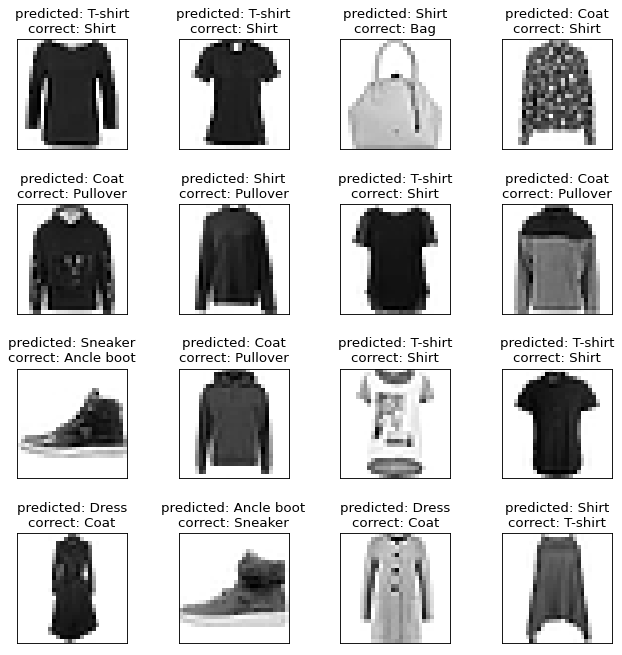

In [110]:
x_fallos= x_test[y_pred!=y_test]
y_fallos= y_pred[y_pred!=y_test]
y_right= y_test[y_pred!=y_test]

offset = np.random.randint(y_fallos.shape[0]-16)
plt.figure(figsize=(10, 10), dpi=80);
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_fallos[i+offset],cmap=plt.cm.binary)
    plt.title(f"predicted: {class_names[y_fallos[i+offset]]}\ncorrect: {class_names[y_right[i+offset]]}")

In [112]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [114]:
history = pd.DataFrame(data=fit_history.history)
history.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.475098,0.824950,0.344047,0.8771
1,0.306256,0.887517,0.359530,0.8683
2,0.261378,0.903233,0.291418,0.8920
3,0.230558,0.913433,0.269327,0.9022
4,0.205236,0.923133,0.274728,0.9016


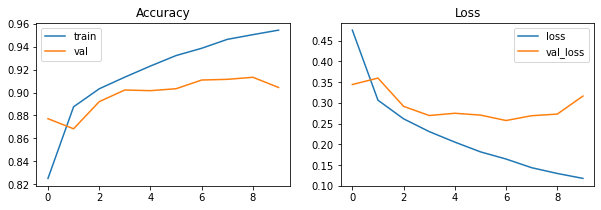

In [140]:
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,2,1);
ax2=plt.subplot(1,2,2);
history.plot(y=["accuracy","val_accuracy"],ax=ax1,title="Accuracy")
ax1.legend(["train","val"]);
history.plot(y=["loss","val_loss"],ax=ax2,title="Loss")
ax1.legend(["train","val"]);

In [1]:
path="./model_tf"
model.save(path)

NameError: name 'model' is not defined

In [171]:
from matplotlib import cm
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

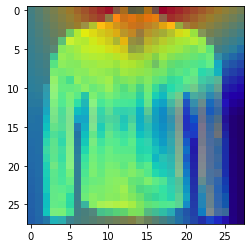

In [191]:
# Create GradCAM++ object
n_image = 5

gradcam = Gradcam(model,model_modifier=ReplaceToLinear(),
                          clone=True)

# Generate cam with GradCAM++
cam = gradcam(CategoricalScore(y_test[n_image]),
              x_test[n_image],penultimate_layer=8)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

plt.imshow(x_test[n_image]);
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
plt.imshow(heatmap, cmap='jet', alpha=0.5); # overlay